# India has made it People's G20 Summit: PM Modi

In [1]:
#SENTIMENT ANALYSIS AND SUMMARIZATION

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go


import re
import nltk
##nltk -- WordNet Interface - Nltk :: Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

Why sentiment analysis?

Business: In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some products.

Politics: In the political field, it is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level. It can be used to predict election results as well! .

Public Actions: Sentiment analysis also is used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere.

#VADER Sentiment Analysis :

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and 
rule-based sentiment analysis tool that is specifically attuned to sentiments 
expressed in social media. 

Lexicon and rule-based sentiment analysis are two approaches to sentiment analysis. In the lexicon-based approach, a set of rules (also known as lexicons) is created to label text as positive, negative, or neutral. The rules are based on the polarity of words in the text. Some widely used lexicon-based approaches are TextBlob, VADER, and SentiWordNet 123.

In contrast, the rule-based approach involves analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive, negative, or neutral. These rules are also known as lexicons. Hence, the rule-based approach is called a lexicon-based approach. 



VADER uses a combination of A sentiment lexicon is a 
list of lexical features (e.g., words) which are generally labeled according to their 
semantic orientation as either positive or negative. 

VADER not only tells about the Positivity and Negativity score but also tells us 
about how positive or negative a sentiment is.


In [3]:
G20_speech=""" Leaders of the world's 20 big economies ended a summit in the Indian capital on 
Sunday overcoming deep divisions over the war in Ukraine to produce a consensus document 
and move forward on issues such overhauling institutions like the World Bank.

They also formally admitted the African Union to the bloc to make the grouping more 
representative.

SOFTER LANGUAGE ON UKRAINE WAR
G20 nations agreed that states cannot grab territory by force and highlighted the 
suffering of the people of Ukraine, but avoided direct criticism of Russia for the war. 
The declaration was seen as an apparent softening from the position that the G20 took 
last year when it condemned Russia for the war and demanded that it withdraw from Ukraine. 

Diplomats said Russia would never have accepted an outright condemnation and that it was 
still a successful outcome because everyone including Russia committed themselves to not 
seizing territory by force.

Host India along with Brazil, Indonesia and South Africa, played a key role in avoiding a 
fracturing of the G20 over the Ukraine conflict, officials said, reflecting the growing 
power of the Global South developing nations in the group.

AFRICAN UNION INSIDE THE CLUB
The 55-member African Union was formally made permanent member of the G20, 
on par with the European Union, in order to make the grouping more representative.
Until now only South Africa was a member of the G20. The entry of the AU would 
provide greater voice to the Global South within the G20 where the G7 countries 
have long played a dominant role.

The move also came after the BRICs, another group dominated by China and Russia, 
was expanded to include Saudi Arabia and Iran among other nations which was seen as 
an attempt by Beijing to make it a possible alternate to the G20.

U.S., SAUDI, INDIA JOIN HANDS FOR TRANSPORT CORRIDOR
Leaders of the United States, India and Saudi Arabia among others announced plans to 
set up rail and ports links between the Middle East and South Asia and eventually to 
Europe which U.S. President Joe Biden said was a "real big deal."

The Biden administration is seeking to counter China's Belt and Road push on global 
infrastructure by pitching Washington as an alternative partner and investor for 
developing countries at the G20 grouping.

But there were no details about financing or a time frame for the project that 
involved laying down railway lines in the Middle East and then connecting them to India by port.

INCREMENTAL PROGRESS ON CLIMATE CHANGE

The G20 leaders agreed to pursue tripling renewable energy capacity globally by 2030 
and accepted the need to phase-down unabated coal power, but stopped short of setting 
major climate goals.

The group did not provide any plan to amend existing policies and targets in order to 
achieve the target of ramping of renewables. It also said $4 trillion a year would be 
needed to pay for a green energy transition but did not lay out any pathway to it.

The deliberations of the G20 were being closely watched ahead of the COP28 U.N climate
summit in the United Arab Emirates later this year.

MODI BOOSTS STANDING AS INDIA'S BIG MOMENT ARRIVES
For Indian Prime Minister Narendra Modi, the leadership of the G20 has been a year-long
opportunity to showcase India as an influential diplomatic and economic power, and drive 
investment and trade flows into the world's most populous country.

It has also provided him a platform to boost his standing at home as he seeks a third term
in office in elections in the next several months. Modi's image has been on G20 billboards
across the capital and in the vast and swanky new conference venue. To his supporters the
successful outcome of the summit showed India's big moment had arrived.

"""

In [4]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [5]:
G20_speech

' Leaders of the world\'s 20 big economies ended a summit in the Indian capital on \nSunday overcoming deep divisions over the war in Ukraine to produce a consensus document \nand move forward on issues such overhauling institutions like the World Bank.\n\nThey also formally admitted the African Union to the bloc to make the grouping more \nrepresentative.\n\nSOFTER LANGUAGE ON UKRAINE WAR\nG20 nations agreed that states cannot grab territory by force and highlighted the \nsuffering of the people of Ukraine, but avoided direct criticism of Russia for the war. \nThe declaration was seen as an apparent softening from the position that the G20 took \nlast year when it condemned Russia for the war and demanded that it withdraw from Ukraine. \n\nDiplomats said Russia would never have accepted an outright condemnation and that it was \nstill a successful outcome because everyone including Russia committed themselves to not \nseizing territory by force.\n\nHost India along with Brazil, Indone

In [6]:
G20_speech_cleaned = re.sub('[^\w\s]',' ',G20_speech)
G20_speech_cleaned = G20_speech_cleaned.lower()

In [7]:
G20_speech_word = word_tokenize(G20_speech_cleaned)

In [8]:
speech_filtered = [word for word in G20_speech_word if word not in stopwords.words("english")]
speech_filtered

['leaders',
 'world',
 '20',
 'big',
 'economies',
 'ended',
 'summit',
 'indian',
 'capital',
 'sunday',
 'overcoming',
 'deep',
 'divisions',
 'war',
 'ukraine',
 'produce',
 'consensus',
 'document',
 'move',
 'forward',
 'issues',
 'overhauling',
 'institutions',
 'like',
 'world',
 'bank',
 'also',
 'formally',
 'admitted',
 'african',
 'union',
 'bloc',
 'make',
 'grouping',
 'representative',
 'softer',
 'language',
 'ukraine',
 'war',
 'g20',
 'nations',
 'agreed',
 'states',
 'grab',
 'territory',
 'force',
 'highlighted',
 'suffering',
 'people',
 'ukraine',
 'avoided',
 'direct',
 'criticism',
 'russia',
 'war',
 'declaration',
 'seen',
 'apparent',
 'softening',
 'position',
 'g20',
 'took',
 'last',
 'year',
 'condemned',
 'russia',
 'war',
 'demanded',
 'withdraw',
 'ukraine',
 'diplomats',
 'said',
 'russia',
 'would',
 'never',
 'accepted',
 'outright',
 'condemnation',
 'still',
 'successful',
 'outcome',
 'everyone',
 'including',
 'russia',
 'committed',
 'seizing',


In [9]:
wnl = WordNetLemmatizer()
speech_lemmatize = [wnl.lemmatize(word) for word in speech_filtered]
speech_lemmatize

['leader',
 'world',
 '20',
 'big',
 'economy',
 'ended',
 'summit',
 'indian',
 'capital',
 'sunday',
 'overcoming',
 'deep',
 'division',
 'war',
 'ukraine',
 'produce',
 'consensus',
 'document',
 'move',
 'forward',
 'issue',
 'overhauling',
 'institution',
 'like',
 'world',
 'bank',
 'also',
 'formally',
 'admitted',
 'african',
 'union',
 'bloc',
 'make',
 'grouping',
 'representative',
 'softer',
 'language',
 'ukraine',
 'war',
 'g20',
 'nation',
 'agreed',
 'state',
 'grab',
 'territory',
 'force',
 'highlighted',
 'suffering',
 'people',
 'ukraine',
 'avoided',
 'direct',
 'criticism',
 'russia',
 'war',
 'declaration',
 'seen',
 'apparent',
 'softening',
 'position',
 'g20',
 'took',
 'last',
 'year',
 'condemned',
 'russia',
 'war',
 'demanded',
 'withdraw',
 'ukraine',
 'diplomat',
 'said',
 'russia',
 'would',
 'never',
 'accepted',
 'outright',
 'condemnation',
 'still',
 'successful',
 'outcome',
 'everyone',
 'including',
 'russia',
 'committed',
 'seizing',
 'territo

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti = SentimentIntensityAnalyzer()
sentiment_scores = [senti.polarity_scores(word)['compound'] for word in speech_lemmatize]
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1027,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5994,
 0.0,
 0.0,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4767,
 0.0,
 0.0,
 -0.34,
 0.0,
 -0.4404,
 0.0,
 -0.5994,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4404,
 0.0,
 -0.5994,
 -0.2263,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2732,
 0.0,
 -0.5859,
 0.0,
 0.5859,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 -0.34,
 0.0,
 0.0,
 0.0,
 -0.3182,
 0.0,
 0.0,
 0.0,
 0.1779,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
#benchmark

pos_words = [word[1] for word in enumerate(speech_lemmatize) if sentiment_scores[word[0]]>0.1]
neg_words = [word[1] for word in enumerate(speech_lemmatize) if sentiment_scores[word[0]]<-0.1]
neu_words = [word[1] for word in enumerate(speech_lemmatize) if sentiment_scores[word[0]]>=-0.1 and sentiment_scores[word[0]]<=0.1]

In [24]:
print('Positive words:',pos_words,end='\n\n')
print('Negative words:',neg_words,end='\n\n')
print('Neautral words:',neu_words)

Positive words: ['like', 'admitted', 'agreed', 'accepted', 'successful', 'committed', 'played', 'growing', 'greater', 'played', 'join', 'hand', 'united', 'progress', 'agreed', 'energy', 'accepted', 'energy', 'united', 'boost', 'opportunity', 'influential', 'boost', 'supporter', 'successful']

Negative words: ['war', 'war', 'suffering', 'avoided', 'criticism', 'war', 'condemned', 'war', 'demanded', 'condemnation', 'avoiding', 'conflict', 'stopped', 'pay']

Neautral words: ['leader', 'world', '20', 'big', 'economy', 'ended', 'summit', 'indian', 'capital', 'sunday', 'overcoming', 'deep', 'division', 'ukraine', 'produce', 'consensus', 'document', 'move', 'forward', 'issue', 'overhauling', 'institution', 'world', 'bank', 'also', 'formally', 'african', 'union', 'bloc', 'make', 'grouping', 'representative', 'softer', 'language', 'ukraine', 'g20', 'nation', 'state', 'grab', 'territory', 'force', 'highlighted', 'people', 'ukraine', 'direct', 'russia', 'declaration', 'seen', 'apparent', 'softeni

In [25]:
pos_word_frequency = nltk.FreqDist(pos_words)
neg_word_frequency = nltk.FreqDist(neg_words)
neu_word_frequency = nltk.FreqDist(neu_words)


In [30]:
print(pos_word_frequency.items)
print(neg_word_frequency.items)
print(neu_word_frequency.items)

<built-in method items of FreqDist object at 0x0000018D8A078DB0>
<built-in method items of FreqDist object at 0x0000018D8A078EA0>
<built-in method items of FreqDist object at 0x0000018D8A078EF0>


In [52]:
df_positive=pd.DataFrame(pos_word_frequency.most_common(40),columns=["Word","Frequency"])
df_negative=pd.DataFrame(neg_word_frequency.most_common(40),columns=["Word","Frequency"])
df_neutral=pd.DataFrame(neu_word_frequency.most_common(40),columns=["Word","Frequency"])

In [53]:
df_positive.head()

,Word,Frequency
0,agreed,2
1,accepted,2
2,successful,2
3,played,2
4,united,2


In [54]:
df_negative.head()

,Word,Frequency
0,war,4
1,suffering,1
2,avoided,1
3,criticism,1
4,condemned,1


In [55]:
positive_figure = px.bar(df_positive,x='Word',y='Frequency',title='Frequency vs Top +ve Words')
negative_figure = px.bar(df_negative,x='Word',y='Frequency',title='Frequency vs Top -ve Words')
neutral_figure = px.bar(df_neutral,x='Word',y='Frequency',title='Frequency vs Top Neutral Words')

In [56]:
positive_figure.show()
negative_figure.show()
neutral_figure.show()

In [57]:
wordcloud_positive = WordCloud().generate_from_frequencies(pos_word_frequency)
wordcloud_negative = WordCloud().generate_from_frequencies(neg_word_frequency)
wordcloud_neutral = WordCloud().generate_from_frequencies(neu_word_frequency)

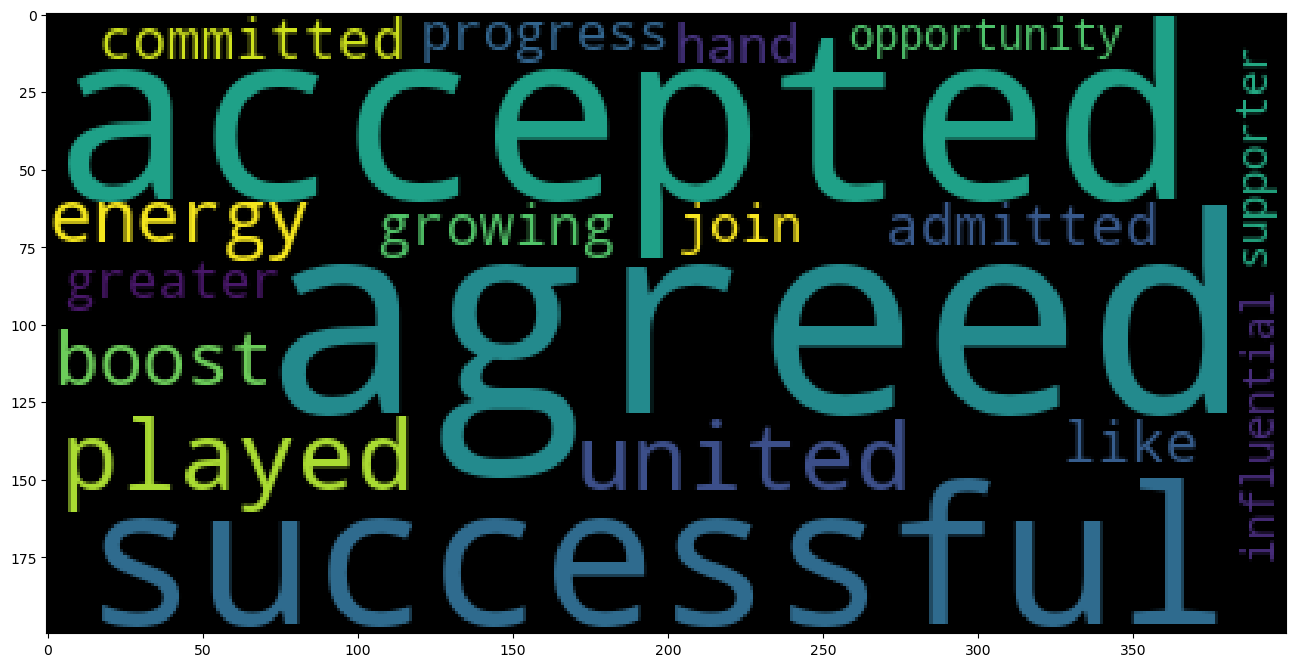

In [58]:
plt.figure(figsize=(16,16))
plt.imshow(wordcloud_positive)

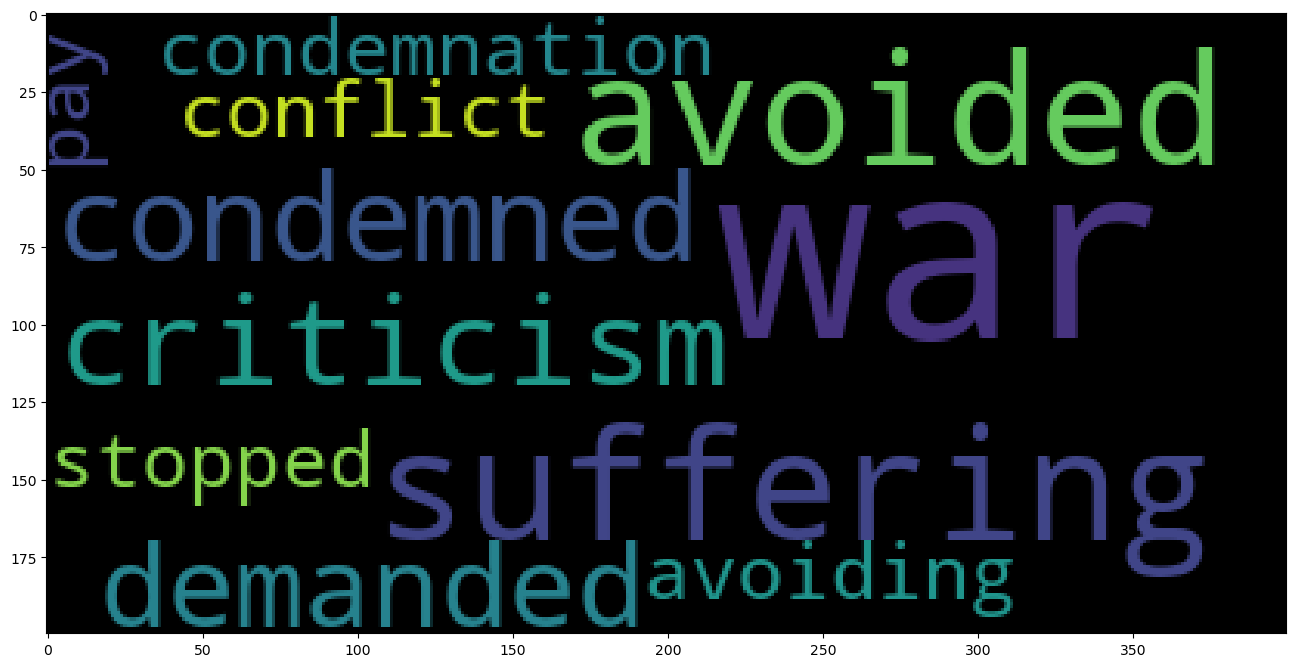

In [59]:
plt.figure(figsize=(16,16))
plt.imshow(wordcloud_negative)

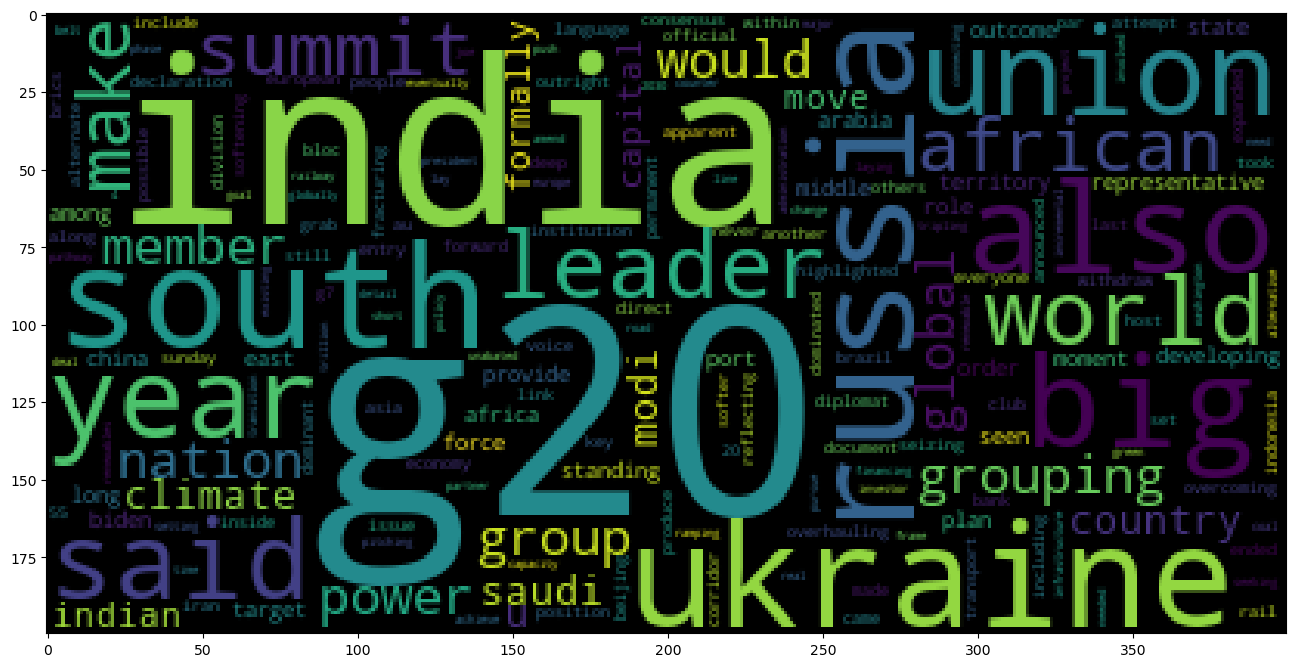

In [60]:
plt.figure(figsize=(16,16))
plt.imshow(wordcloud_neutral)